## Récupération des données

In [1]:
import matplotlib.pyplot as plt
import numpy as np 
import pandas as pd
import seaborn as sns 
pd.set_option("display.max_columns",500)
import missingno as msno

In [2]:
data2015 = pd.read_csv('2015-building-energy-benchmarking.csv')
data2016 = pd.read_csv('2016-building-energy-benchmarking.csv')

In [3]:
data2015.shape

(3340, 47)

On a 47 variables  et 3340 obsérvations

In [4]:
data2016.shape

(3376, 46)

On a 46 variables et 3376 obsérvations

In [5]:
data2015.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'TaxParcelIdentificationNumber', 'Location',
       'CouncilDistrictCode', 'Neighborhood', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'OtherFuelUse(kBtu)',
       'GHGEmissions(MetricTonsCO2e)', 'GHGEmissionsIntensity(kgCO2e/ft2)',
       'DefaultData', '

In [6]:
data2016.columns

Index(['OSEBuildingID', 'DataYear', 'BuildingType', 'PrimaryPropertyType',
       'PropertyName', 'Address', 'City', 'State', 'ZipCode',
       'TaxParcelIdentificationNumber', 'CouncilDistrictCode', 'Neighborhood',
       'Latitude', 'Longitude', 'YearBuilt', 'NumberofBuildings',
       'NumberofFloors', 'PropertyGFATotal', 'PropertyGFAParking',
       'PropertyGFABuilding(s)', 'ListOfAllPropertyUseTypes',
       'LargestPropertyUseType', 'LargestPropertyUseTypeGFA',
       'SecondLargestPropertyUseType', 'SecondLargestPropertyUseTypeGFA',
       'ThirdLargestPropertyUseType', 'ThirdLargestPropertyUseTypeGFA',
       'YearsENERGYSTARCertified', 'ENERGYSTARScore', 'SiteEUI(kBtu/sf)',
       'SiteEUIWN(kBtu/sf)', 'SourceEUI(kBtu/sf)', 'SourceEUIWN(kBtu/sf)',
       'SiteEnergyUse(kBtu)', 'SiteEnergyUseWN(kBtu)', 'SteamUse(kBtu)',
       'Electricity(kWh)', 'Electricity(kBtu)', 'NaturalGas(therms)',
       'NaturalGas(kBtu)', 'DefaultData', 'Comments', 'ComplianceStatus',
       'Outlier

In [7]:
# les variables non communs entre data 2015 et data2016
set(data2015.columns.tolist()).difference(data2016.columns.tolist())

{'2010 Census Tracts',
 'City Council Districts',
 'Comment',
 'GHGEmissions(MetricTonsCO2e)',
 'GHGEmissionsIntensity(kgCO2e/ft2)',
 'Location',
 'OtherFuelUse(kBtu)',
 'SPD Beats',
 'Seattle Police Department Micro Community Policing Plan Areas',
 'Zip Codes'}

In [8]:
# les variables non communs entre data 2016 et data2015
set(data2016.columns.tolist()).difference(data2015.columns.tolist())

{'Address',
 'City',
 'Comments',
 'GHGEmissionsIntensity',
 'Latitude',
 'Longitude',
 'State',
 'TotalGHGEmissions',
 'ZipCode'}

#### Renomages  les deux colonnes 2016: 'GHGEmissionsIntensity', 'TotalGHGEmissions'

In [9]:
data2016.rename(columns={'GHGEmissionsIntensity':'GHGEmissionsIntensity(kgCO2e/ft2)','TotalGHGEmissions':'GHGEmissions(MetricTonsCO2e)'},inplace=True)

In [10]:
# Aprés renomage 
set(data2016.columns.tolist()).difference(data2015.columns.tolist())

{'Address', 'City', 'Comments', 'Latitude', 'Longitude', 'State', 'ZipCode'}

#### Récupération leschamps {latitude,longitude,address,city,zip} dans la collone Location dans data2015

In [11]:
data2015['Latitude']=data2015['Location'].apply(lambda x :eval(x)['latitude'])
data2015['Longitude']=data2015['Location'].apply(lambda x :eval(x)['longitude'])
data2015['human_address']=data2015['Location'].apply(lambda x :eval(x)['human_address'])
data2015['Address']=data2015['human_address'].apply(lambda x:eval(x)['address'])
data2015['City']=data2015['human_address'].apply(lambda x:eval(x)['city'])
data2015['ZipCode']=data2015['human_address'].apply(lambda x:eval(x)['zip'])

#### Supression des colonnes {human_address,Location,City Council Districts,Seattle Police Department Micro Community Policing Plan Areas,SPD Beats,Comment,Zip Codes} dans data2015

In [12]:
# les colonnes à supprimer 
data2015.loc[:,['human_address','Location','City Council Districts','Seattle Police Department Micro Community Policing Plan Areas','SPD Beats','Comment','Zip Codes']]

human_address  \
0     {"address": "405 OLIVE WAY", "city": "SEATTLE"...   
1     {"address": "724 PINE ST", "city": "SEATTLE", ...   
2     {"address": "1900 5TH AVE", "city": "SEATTLE",...   
3     {"address": "620 STEWART ST", "city": "SEATTLE...   
4     {"address": "401 LENORA ST", "city": "SEATTLE"...   
...                                                 ...   
3335  {"address": "321 10TH AVE S", "city": "SEATTLE...   
3336  {"address": "4123 12TH AVE NE", "city": "SEATT...   
3337  {"address": "2030 8TH AVE", "city": "SEATTLE",...   
3338  {"address": "3801 NE 77TH ST", "city": "SEATTL...   
3339  {"address": "7540 37TH AVE NE", "city": "SEATT...   

                                               Location  \
0     {'latitude': '47.61219025', 'longitude': '-122...   
1     {'latitude': '47.61310583', 'longitude': '-122...   
2     {'latitude': '47.61334897', 'longitude': '-122...   
3     {'latitude': '47.61421585', 'longitude': '-122...   
4     {'latitude': '47.6137544', 'longitude': '-122....   
...                                                 ...   
3335  {'latitude': '47.59950256', 'longitude': '-122...   
3336  {'latitude': '47.65752471', 'longitude': '-122...   
3337  {'latitude': '47.61649845', 'longitude': '-122...   
3338  {'latitude': '47.68396954', 'longitude': '-122...   
3339  {'latitude': '47.68396954', 'longitude': '-122...   

      City Council Districts  \
0                        NaN   
1                        NaN   
2                        NaN   
3                        NaN   
4                        NaN   
...                      ...   
3335                     NaN   
3336                     NaN   
3337                     NaN   
3338                     NaN   
3339                     NaN   

      Seattle Police Department Micro Community Policing Plan Areas  \
0                                                  14.0               
1                                                  14.0               
2                                                  56.0               
3                                                  56.0               
4                                                  56.0               
...                                                 ...               
3335                                               26.0               
3336                                               60.0               
3337                                               56.0               
3338                                               55.0               
3339                                               55.0               

      SPD Beats Comment  Zip Codes  
0          31.0     NaN      18081  
1          31.0     NaN      18081  
2          31.0     NaN      18081  
3          31.0     NaN      18081  
4          31.0     NaN      19576  
...         ...     ...        ...  
3335       16.0     NaN      18379  
3336       38.0     NaN      18383  
3337        7.0     NaN      19576  
3338       48.0     NaN      18792  
3339       48.0     NaN      18792  

[3340 rows x 7 columns]

In [13]:
data2015.drop(columns=['human_address','Location','City Council Districts','Seattle Police Department Micro Community Policing Plan Areas','SPD Beats','Comment','Zip Codes'],inplace=True)

#### Supression les colonnes {'City','State','Comments'}  dans data2016

In [14]:
data2016.drop(columns=['City','State','Comments'],inplace=True)

In [15]:
set(data2016.columns.tolist()).difference(data2015.columns.tolist())

set()

toutes les colonnes data2016 existent dans data2015

In [16]:
set(data2015.columns.tolist()).difference(data2016.columns.tolist())

{'2010 Census Tracts', 'City', 'OtherFuelUse(kBtu)'}

In [17]:
# Suppresion  '2010 Census Tracts', 'City', 'OtherFuelUse(kBtu)'
data2015.drop(columns=['2010 Census Tracts', 'City', 'OtherFuelUse(kBtu)'],inplace=True)

#### Concatenation data2015 et data2016

In [18]:
data=pd.concat([data2015, data2016])

C:\Users\HP\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  """Entry point for launching an IPython kernel.


In [19]:
data.shape

(6716, 43)

##### Diagramme à secteurs pour les variables  dpmean

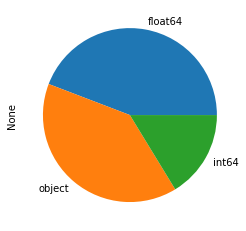

In [20]:
data.dtypes.value_counts().plot.pie()

#### Recherche des doublons :'OSEBuildingID'

In [38]:
liste=data['OSEBuildingID'].tolist()
#fonction qui retourne les doublons dans une liste 
def list_duplicates(listNums):
  once = set()
  seenOnce = once.add
  twice = set( num for num in listNums if num in once or seenOnce(num) )
  return list( twice )

listes=list_duplicates(liste)

In [39]:
print("le nombre batiments total est   {} , le nombre des batiments en double est  {}  ".format(len(liste), len(listes)))

le nombre batiments total est   6716 , le nombre des batiments en double est  3284  


#### Identification des doublons

In [40]:
data['test']=data['OSEBuildingID'].apply(lambda x: 1 if x in listes else 0)
data[data['test']==1]

Address          BuildingType ComplianceStatus  \
0        405 OLIVE WAY        NonResidential        Compliant   
1          724 PINE ST        NonResidential        Compliant   
2         1900 5TH AVE        NonResidential        Compliant   
3       620 STEWART ST        NonResidential        Compliant   
4        401 LENORA ST        NonResidential        Compliant   
...                ...                   ...              ...   
3327    321 10TH AVE S  Multifamily LR (1-4)        Compliant   
3330  4123 12th Ave NE  Multifamily MR (5-9)        Compliant   
3333      2030 8th Ave  Multifamily HR (10+)        Compliant   
3334   3801 NE 77th St  Multifamily LR (1-4)        Compliant   
3335      7540 37th St  Multifamily LR (1-4)        Compliant   

      CouncilDistrictCode  DataYear DefaultData  ENERGYSTARScore  \
0                       7      2015          No             65.0   
1                       7      2015          No             51.0   
2                       7      2015         Yes             18.0   
3                       7      2015          No              1.0   
4                       7      2015          No             67.0   
...                   ...       ...         ...              ...   
3327                    2      2016       False             58.0   
3330                    4      2016       False             96.0   
3333                    7      2016       False              NaN   
3334                    4      2016       False             80.0   
3335                    4      2016       False             70.0   

      Electricity(kBtu)  Electricity(kWh)  GHGEmissions(MetricTonsCO2e)  \
0             3686160.0      1.080307e+06                        249.43   
1             3905411.0      1.144563e+06                        263.51   
2            49762435.0      1.458393e+07                       2061.48   
3             2769023.0      8.115210e+05                       1936.34   
4             6066245.0      1.777841e+06                        507.70   
...                 ...               ...                           ...   
3327          1248599.0      3.659434e+05                          8.70   
3330          1189427.0      3.486010e+05                         31.46   
3333          9164908.0      2.686081e+06                        395.26   
3334           783346.0      2.295855e+05                          5.46   
3335           966812.0      2.833564e+05                          6.74   

      GHGEmissionsIntensity(kgCO2e/ft2) LargestPropertyUseType  \
0                                  2.64                  Hotel   
1                                  2.38                  Hotel   
2                                  1.92                  Hotel   
3                                 31.38                  Hotel   
4                                  4.02                  Hotel   
...                                 ...                    ...   
3327                               0.19    Multifamily Housing   
3330                               0.74    Multifamily Housing   
3333                               1.24    Multifamily Housing   
3334                               0.11    Multifamily Housing   
3335                               0.13    Multifamily Housing   

      LargestPropertyUseTypeGFA     Latitude  \
0                       88434.0  47.61219025   
1                       83880.0  47.61310583   
2                      757243.0  47.61334897   
3                       61320.0  47.61421585   
4                      123445.0   47.6137544   
...                         ...          ...   
3327                    44650.0      47.5998   
3330                    31748.0      47.6576   
3333                   308680.0      47.6165   
3334                    26175.0      47.6844   
3335                    32007.0      47.6843   

                              ListOfAllPropertyUseTypes      Longitude  \
0                                                 Hotel  -122.33799744  

In [41]:
#### Supression des doublons
data.drop_duplicates(subset=['OSEBuildingID'],inplace=True)

In [42]:
data.shape

(3432, 44)

#### Sélection les bâtiments non destinés à l’habitation

In [47]:
data=data[data['BuildingType']=='NonResidential']

### Règles metiers :Critères de surface et  Energy Score
##### PropertyGFATotal = PropertyGFAParking + PropertyGFABuilding(s)
##### ThirdLargestPropertyUseTypeGFA < SecondLargestPropertyUseTypeGFA < LargestPropertyUseTypeGFA
##### 1 < ENERGYSTARScore < 100


In [48]:
critere_ENERGYSTARScore=" ENERGYSTARScore>100 or ENERGYSTARScore<1 "
nb=data.eval(critere_ENERGYSTARScore).sum()

In [49]:
nb

0

In [50]:
data.rename(columns={'PropertyGFABuilding(s)':'PropertyGFABuilding'},inplace=True)
critere_parking= " PropertyGFATotal - PropertyGFAParking -PropertyGFABuilding !=0 "
nbp=data.eval(critere_parking).sum()

In [51]:
nbp

0

In [52]:
critere_surface= " (SecondLargestPropertyUseTypeGFA >  LargestPropertyUseTypeGFA) or (SecondLargestPropertyUseTypeGFA < ThirdLargestPropertyUseTypeGFA) "
nbs=data.eval(critere_surface).sum()

In [53]:
nbs

0

les régles métires sont verifié dans toutes les obsérvations 

In [54]:
data.drop(columns=['Address','ComplianceStatus','YearsENERGYSTARCertified','DataYear','DefaultData','test','Outlier'],inplace=True)

## Visualisation graphique des variables 

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level functi

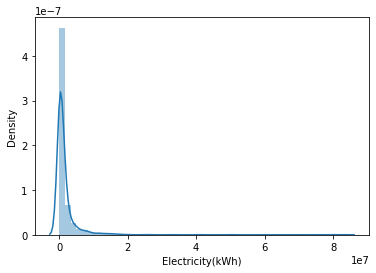

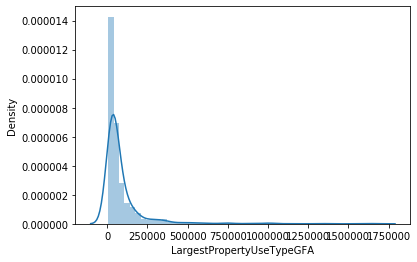

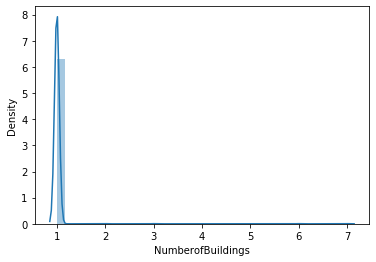

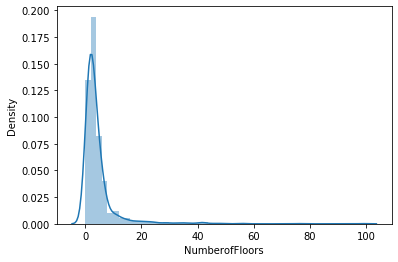

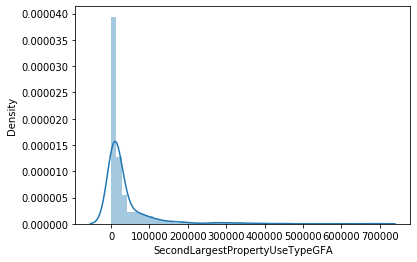

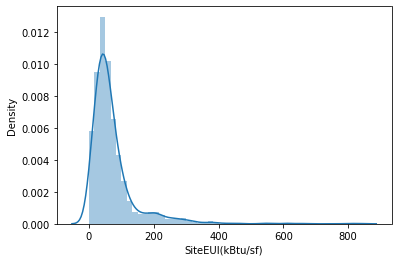

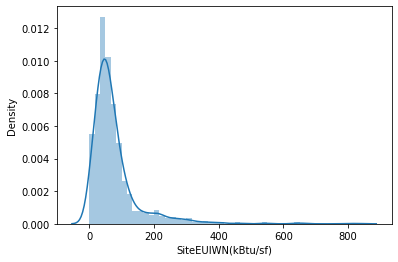

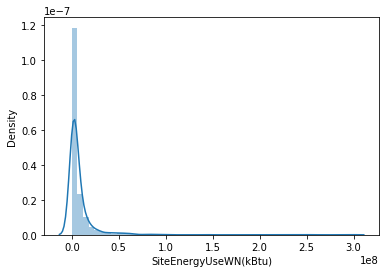

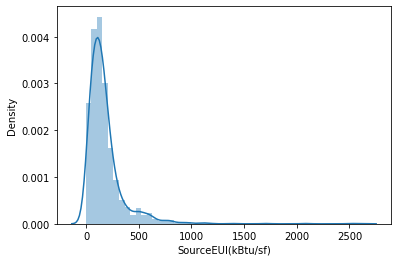

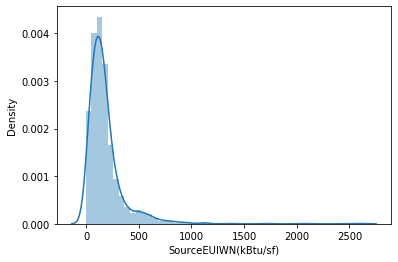

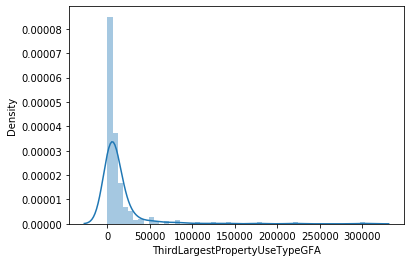

In [55]:
for col in data.select_dtypes('float'):
  plt.figure()
  sns.distplot(data[col],kde=True)  

#### distribution pour les variables target 

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


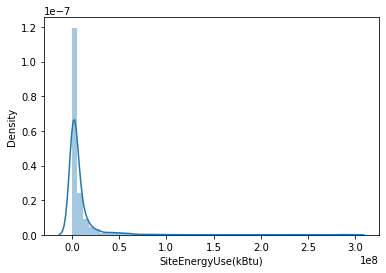

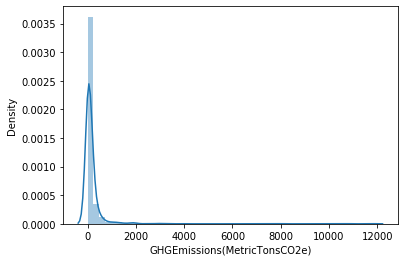

In [56]:
for col in ['SiteEnergyUse(kBtu)','GHGEmissions(MetricTonsCO2e)']:
   plt.figure()
   sns.distplot(data[col],kde=True) 

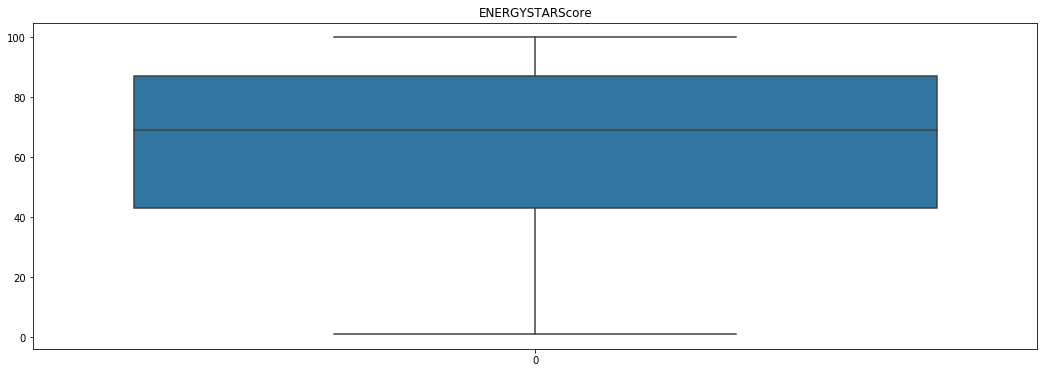

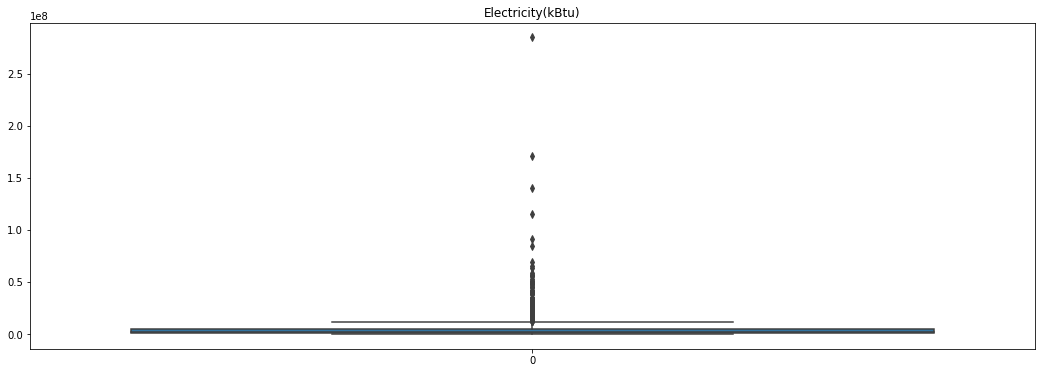

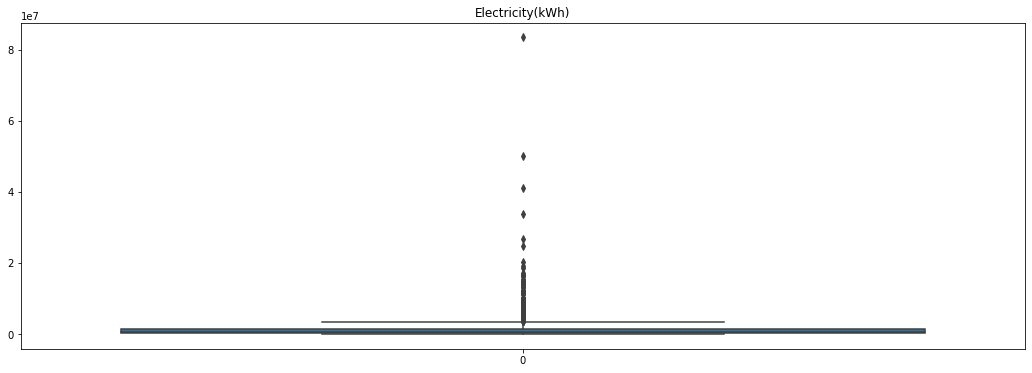

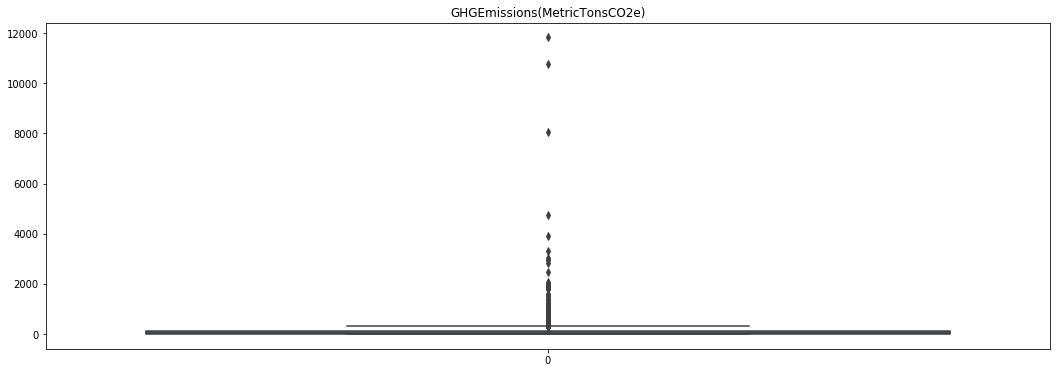

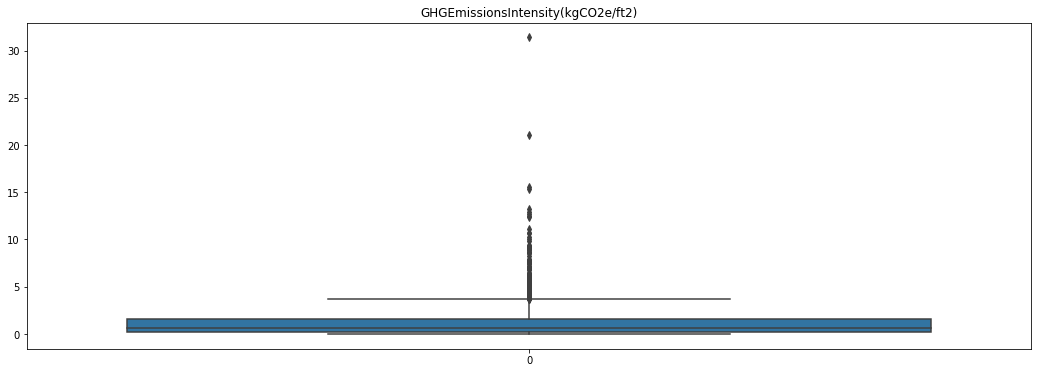

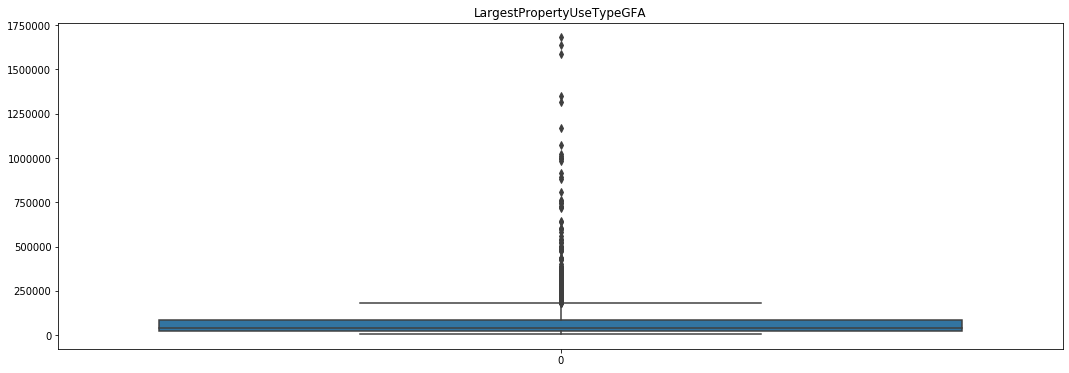

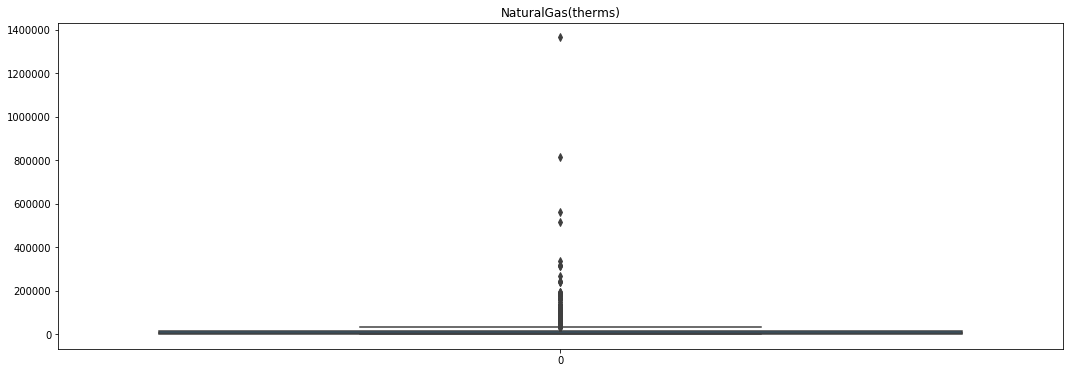

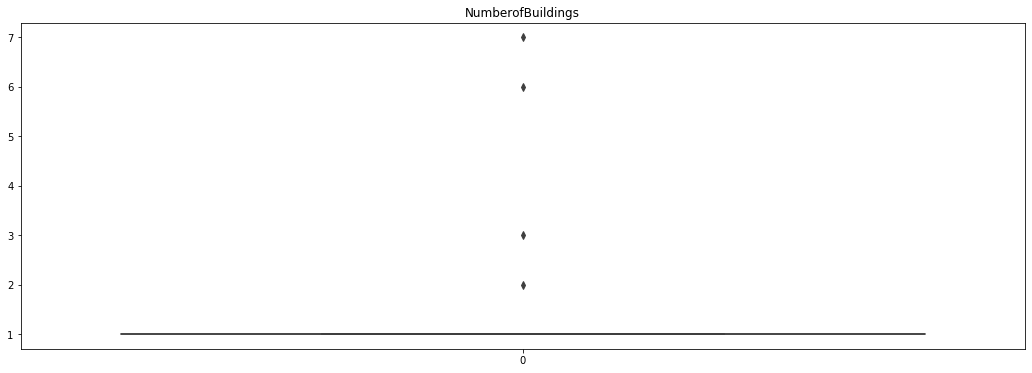

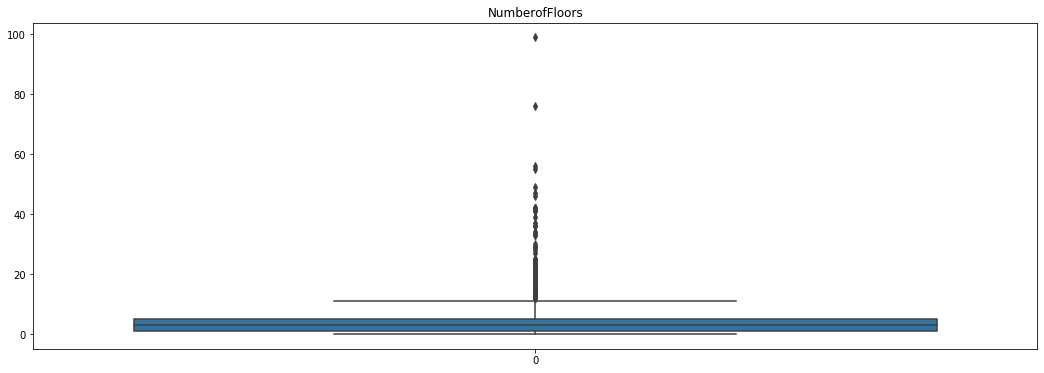

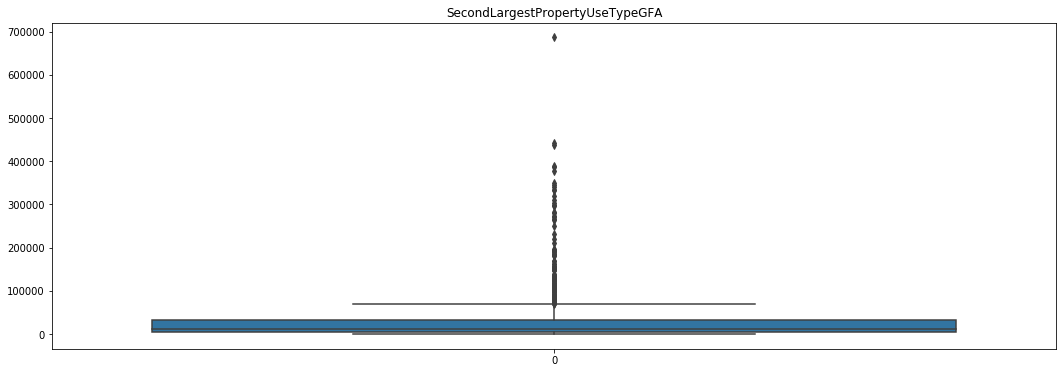

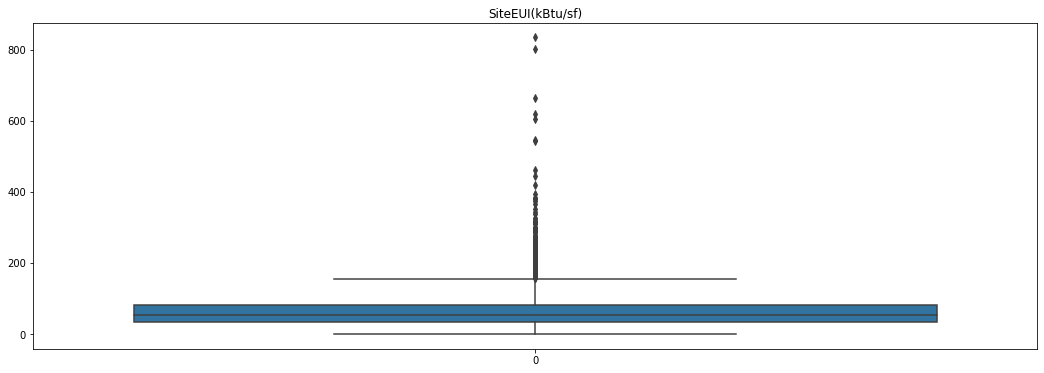

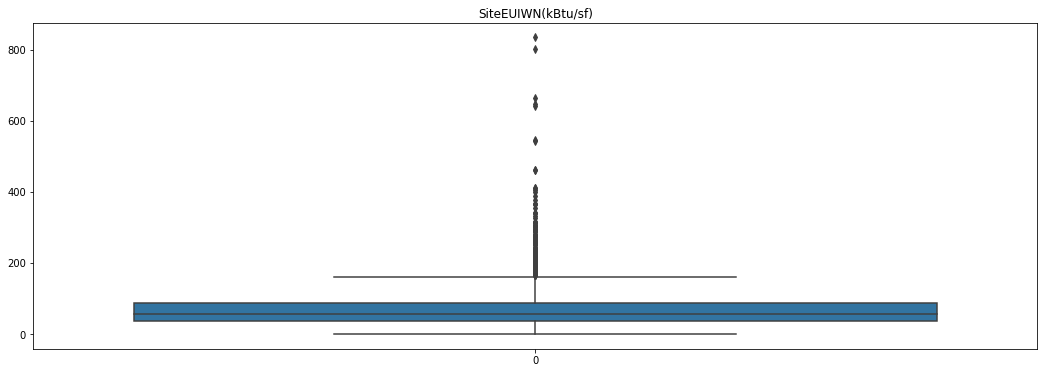

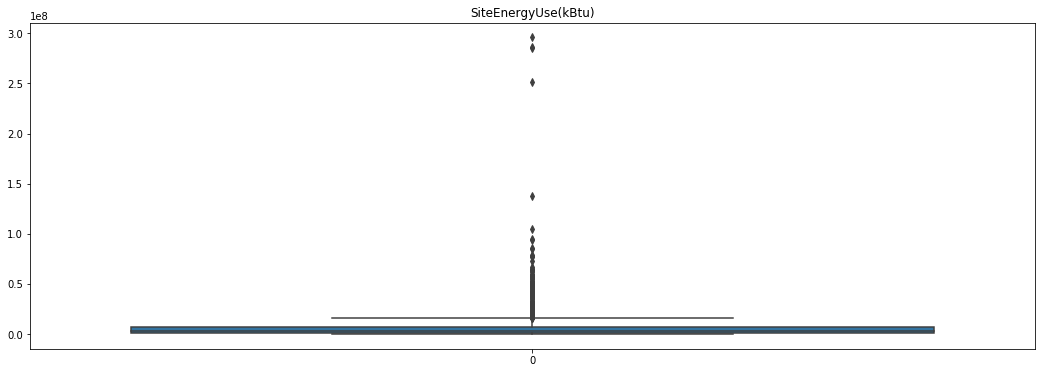

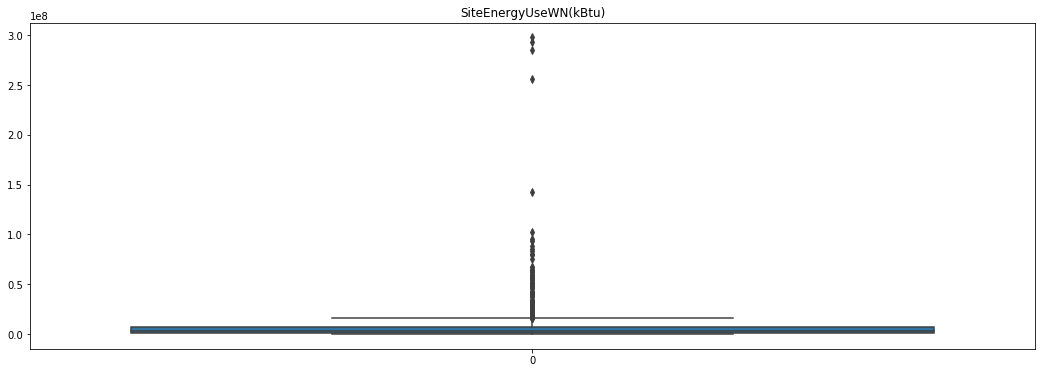

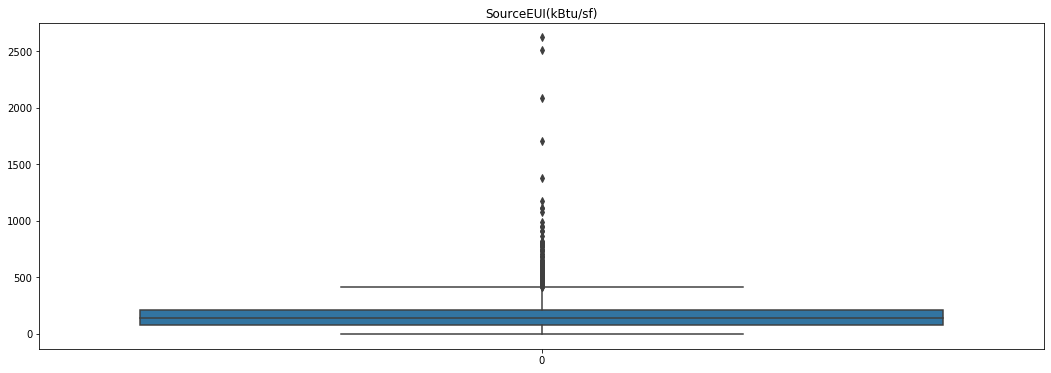

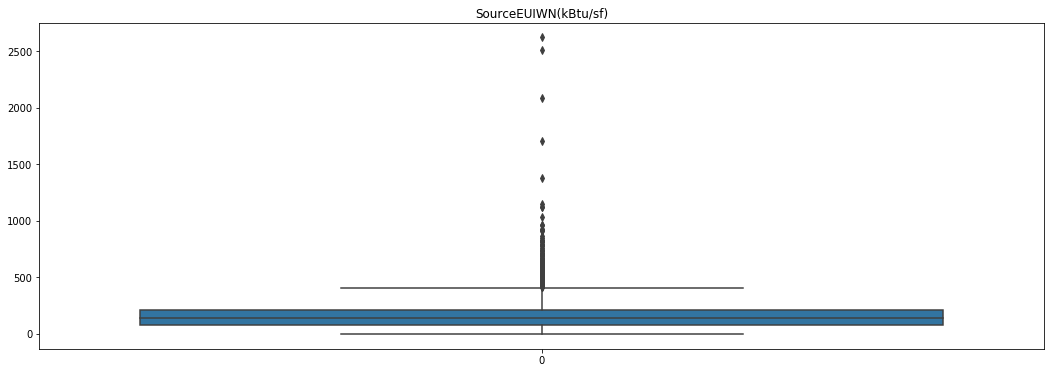

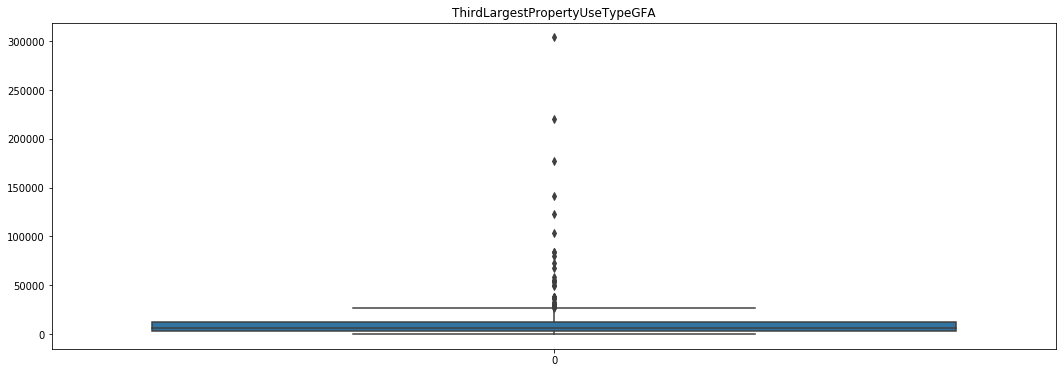

In [57]:
for col in data.select_dtypes('float'): 
  fig,aa=plt.subplots(figsize=(18,6))
  plt.title(col)  
  sns.boxplot(data=data[col],ax=aa)

In [58]:
fig,aa=plt.subplots(figsize=(18,8))
ab=sns.boxplot(data=data,ax=aa)
ab.set_xticklabels(ab.get_xticklabels(),rotation=90)

[Text(0, 0, 'CouncilDistrictCode'),
 Text(0, 0, 'ENERGYSTARScore'),
 Text(0, 0, 'Electricity(kBtu)'),
 Text(0, 0, 'Electricity(kWh)'),
 Text(0, 0, 'GHGEmissions(MetricTonsCO2e)'),
 Text(0, 0, 'GHGEmissionsIntensity(kgCO2e/ft2)'),
 Text(0, 0, 'LargestPropertyUseTypeGFA'),
 Text(0, 0, 'NaturalGas(kBtu)'),
 Text(0, 0, 'NaturalGas(therms)'),
 Text(0, 0, 'NumberofBuildings'),
 Text(0, 0, 'NumberofFloors'),
 Text(0, 0, 'OSEBuildingID'),
 Text(0, 0, 'PropertyGFABuilding'),
 Text(0, 0, 'PropertyGFAParking'),
 Text(0, 0, 'PropertyGFATotal'),
 Text(0, 0, 'SecondLargestPropertyUseTypeGFA'),
 Text(0, 0, 'SiteEUI(kBtu/sf)'),
 Text(0, 0, 'SiteEUIWN(kBtu/sf)'),
 Text(0, 0, 'SiteEnergyUse(kBtu)'),
 Text(0, 0, 'SiteEnergyUseWN(kBtu)'),
 Text(0, 0, 'SourceEUI(kBtu/sf)'),
 Text(0, 0, 'SourceEUIWN(kBtu/sf)'),
 Text(0, 0, 'SteamUse(kBtu)'),
 Text(0, 0, 'ThirdLargestPropertyUseTypeGFA'),
 Text(0, 0, 'YearBuilt')]

#### Boxplot pour les variables target 

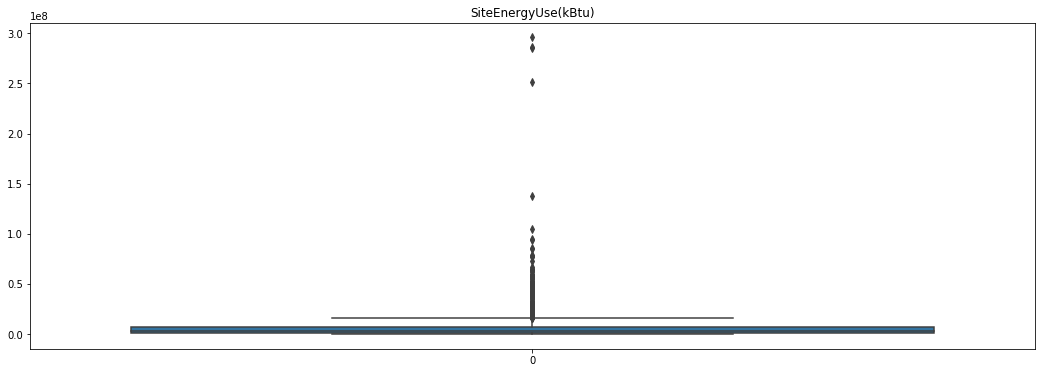

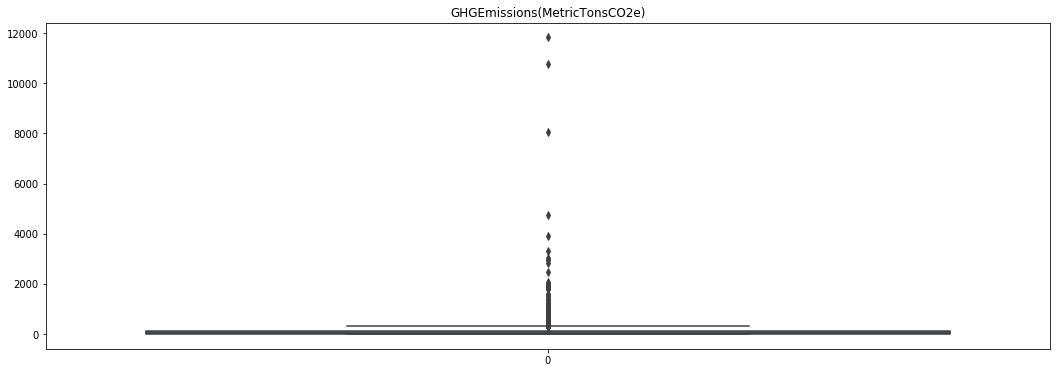

In [59]:
for col in ['SiteEnergyUse(kBtu)','GHGEmissions(MetricTonsCO2e)']: 
  fig,aa=plt.subplots(figsize=(18,6))
  plt.title(col)  
  sns.boxplot(data=data[col],ax=aa)

#### Dénombrements des variables catégorielles avec countplot

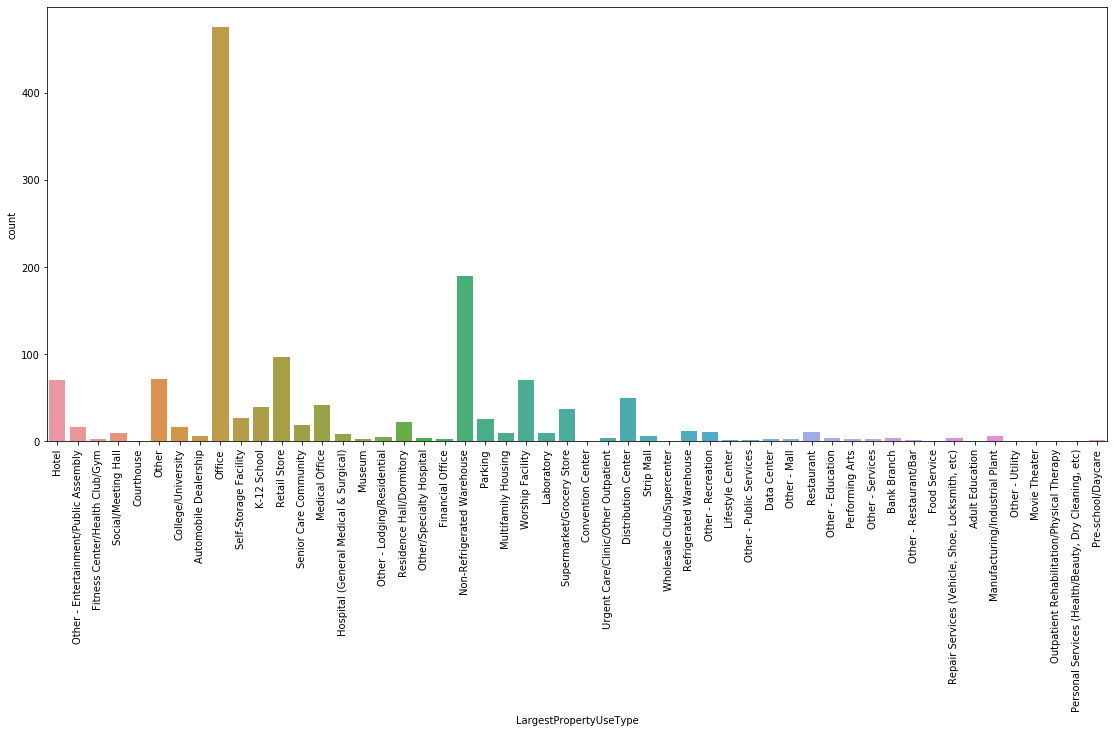

In [60]:
categ=['Neighborhood','PrimaryPropertyType','LargestPropertyUseType','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']
for col in categ:
  fig,aa=plt.subplots(figsize=(19,8))
  aa=sns.countplot(x =col, data = data,ax=aa,orient="h")
  aa.set_xticklabels(aa.get_xticklabels(), rotation=90)

#### Matrice de corealation

In [61]:
fig,aa=plt.subplots(figsize=(18,18))
sns.heatmap(data.corr(),annot=True,ax=aa)

on a une corealation entre SiteEnergyUse et PropertyGFATotal , aussi entre SiteEnergyUse et GHGEmissions(MetricTonsCO2e)

In [62]:
# On supprime les variables enrgitiques sauf les variables target(s)
data.drop(columns=['GHGEmissionsIntensity(kgCO2e/ft2)','SteamUse(kBtu)','SourceEUIWN(kBtu/sf)','SourceEUI(kBtu/sf)','SiteEnergyUseWN(kBtu)','SiteEUI(kBtu/sf)','SiteEUIWN(kBtu/sf)','NaturalGas(kBtu)','NaturalGas(therms)','Electricity(kBtu)','Electricity(kWh)'], inplace=True)

#### standarisation  des variables SiteEnergyUse(kBtu) et  GHGEmissions(MetricTonsCO2e)  par la fonction log

In [63]:
#['SiteEnergyUse(kBtu)','GHGEmissions(MetricTonsCO2e)']
data['sitel']=data['SiteEnergyUse(kBtu)'].apply( lambda x:np.log(x) if x!=0 else x)
data['ghgel']=data['GHGEmissions(MetricTonsCO2e)'].apply( lambda x:np.log(x) if x!=0 else x)

#### distribution  des variables SiteEnergyUse(kBtu) et  GHGEmissions(MetricTonsCO2e)   aprés standarisation 

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


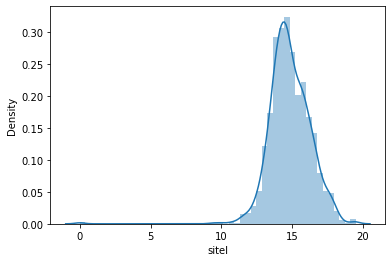

In [64]:
for col in ['sitel','ghgel']:
   plt.figure()
   sns.distplot(data[col],kde=True) 

In [65]:
for col in ['sitel','ghgel']:
   plt.figure()
   sns.boxplot(data[col]) 

C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning
C:\Users\HP\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


 les variables targets existsnte  dans [-2,20]

In [66]:
# les valeuts nuls de sitel à supprimer 
data[data['sitel']==0]
data.drop(data.loc[data['sitel']==0].index,inplace=True)

#### Consommation d'énergie / émissions de CO2 (en moyenne) par rapport PrimaryPropertyType

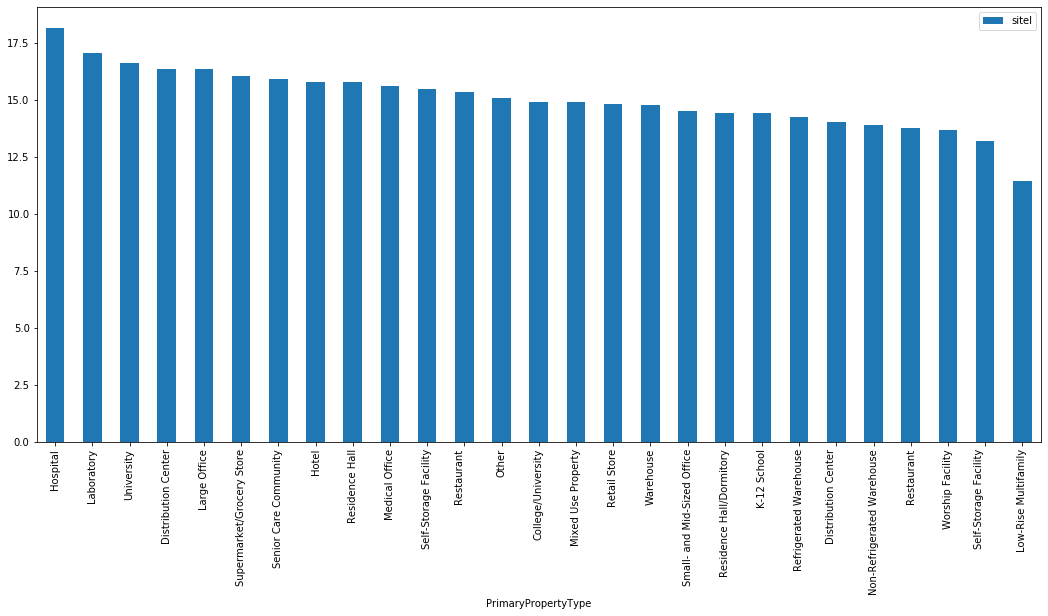

In [67]:
fig,aa=plt.subplots(figsize=(18,8))
data.groupby(['PrimaryPropertyType']).mean().loc[:,['sitel']].sort_values(by='sitel',ascending=False).plot.bar(ax=aa)

hospital consomme bcp d'energie par rapport les autres types, une consomation minimale  d'energie pour Low-Rize Mutifamily 

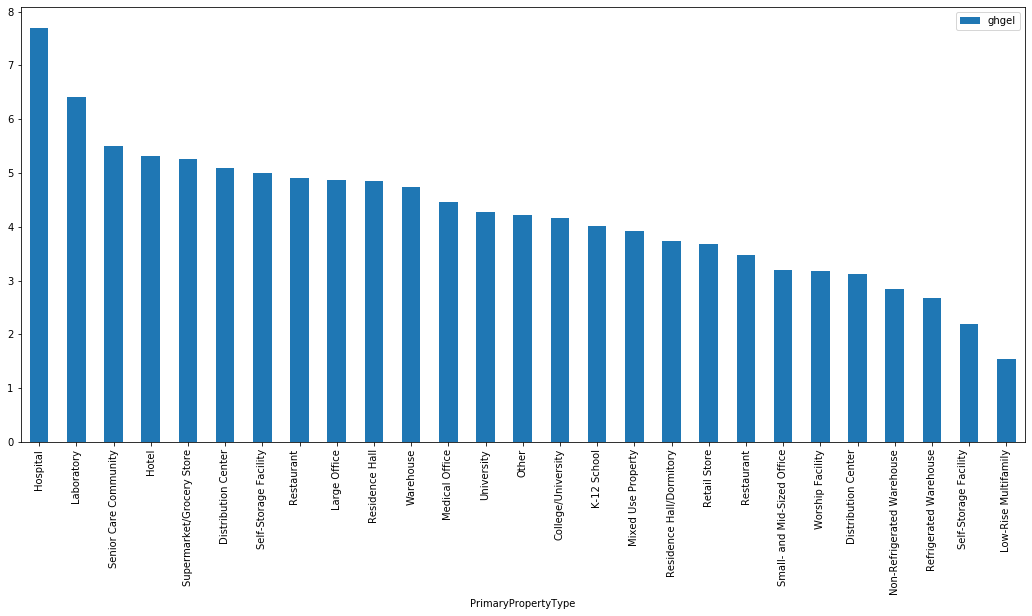

In [68]:
fig,aa=plt.subplots(figsize=(18,8))
data.groupby(['PrimaryPropertyType']).mean().loc[:,['ghgel']].sort_values(by='ghgel',ascending=False).plot.bar(ax=aa)

la quantite  co2 emise la plus grande  existe dans Hospital , par contre une quantite minimale emise de co2 pour Low_Rise Multifamily 

#### Analyse de l'influence du situation géographique

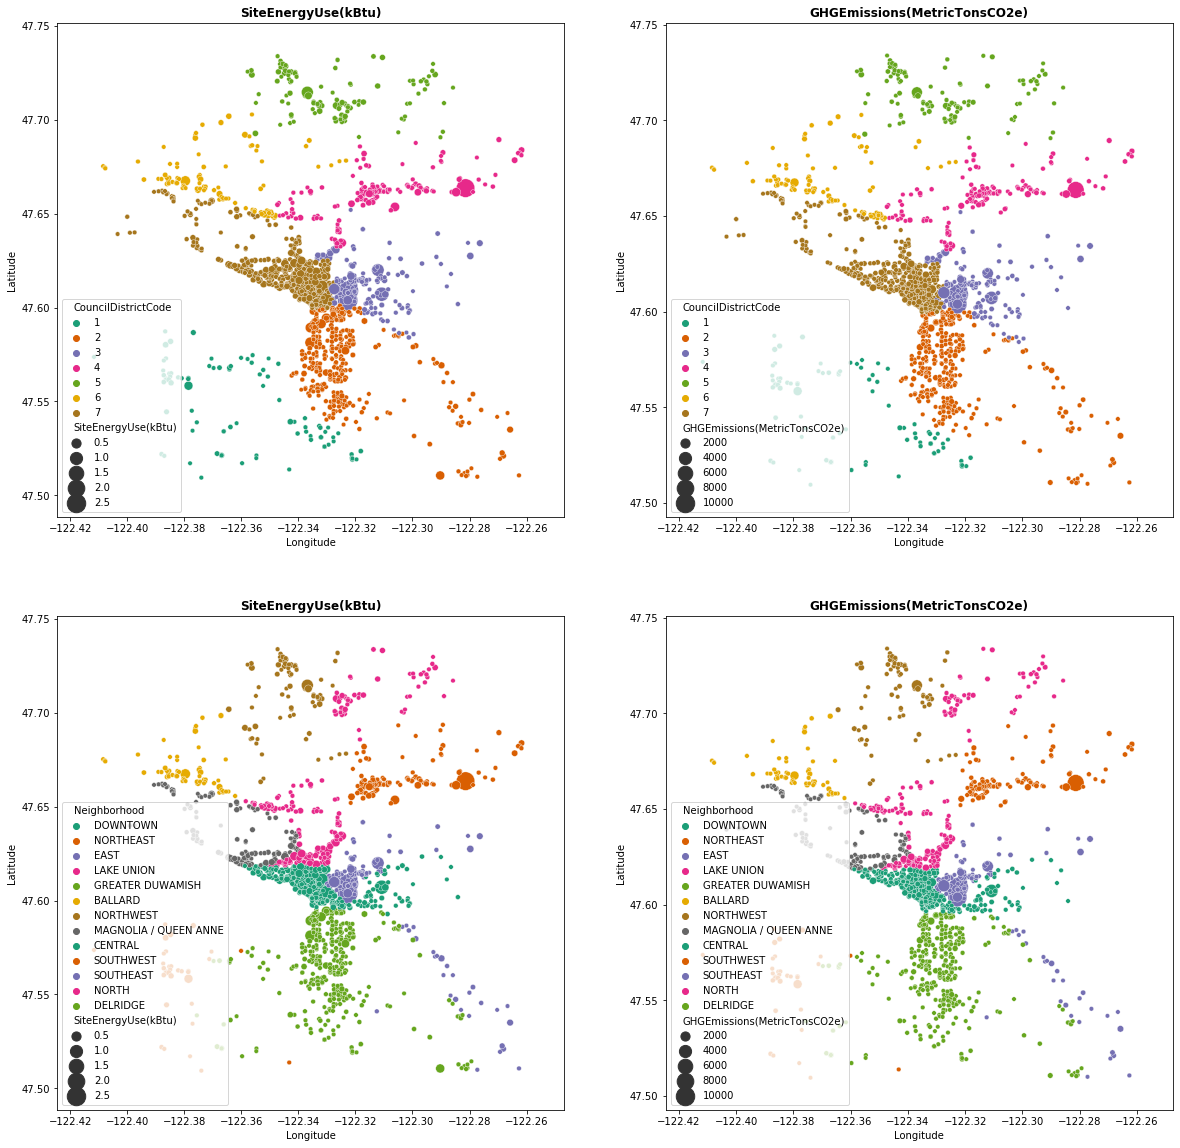

In [69]:
data['Latitude']=data['Latitude'].astype('float')
data['Longitude']=data['Longitude'].astype('float')
var_to_viz = ['SiteEnergyUse(kBtu)','GHGEmissions(MetricTonsCO2e)']
fig, ax = plt.subplots(2,2, figsize=(20,20))
hues = ['CouncilDistrictCode', 'Neighborhood']
for j, hue in enumerate(hues):
    for i, var in enumerate(var_to_viz):
        g = sns.scatterplot(x='Longitude',y='Latitude',hue=hue,palette="Dark2", ax=ax[j,i], data=data,sizes=(20,400),size=var)
        g.set_title(var, fontweight='bold')

 Une consomation d'enrgie  anuelle  est grande dans EAST et NORTHEAST et 
 une consomation d'enrgie  anuelle  est grande pour ConcilDistrictCode=1,3

#### Remplissage les valeurs manquantes des variables catégorielles par "Non renseigné" et la mediane pour les variables quantitives

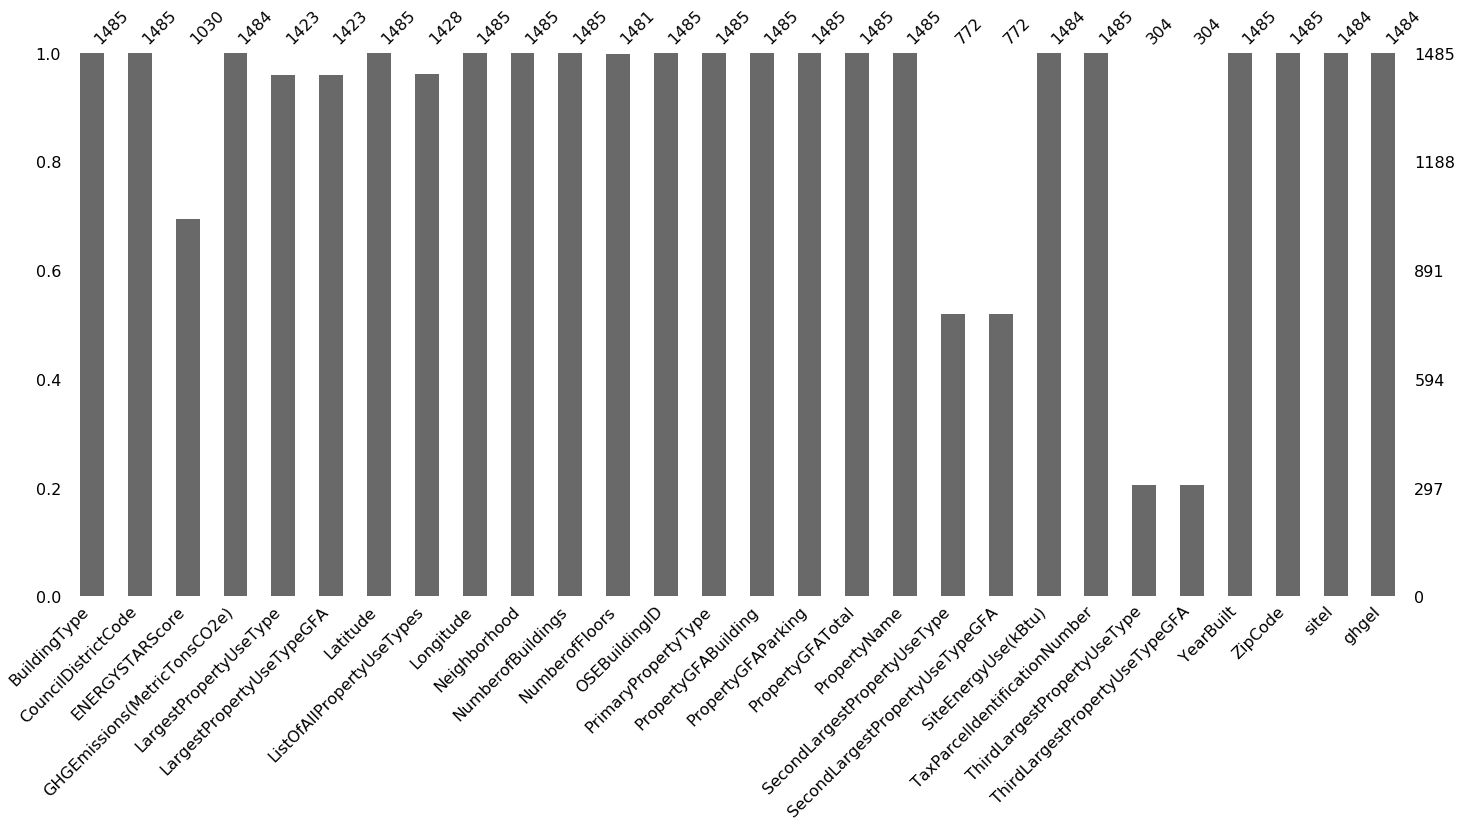

In [70]:
# Avant remplissage 
msno.bar(data)

In [72]:
col_quan_na =['ENERGYSTARScore','GHGEmissions(MetricTonsCO2e)','LargestPropertyUseTypeGFA','SecondLargestPropertyUseTypeGFA','ThirdLargestPropertyUseTypeGFA','sitel','ghgel','SiteEnergyUse(kBtu)'] 
col_cat_na =['LargestPropertyUseType','ListOfAllPropertyUseTypes','NumberofFloors','SecondLargestPropertyUseType','ThirdLargestPropertyUseType']  

for colq in col_quan_na:
    data[colq]=data[colq].fillna(data[colq].mean()) 
    
for colc in col_cat_na:
    data[colc]=data[colc].fillna('non renseigné')        

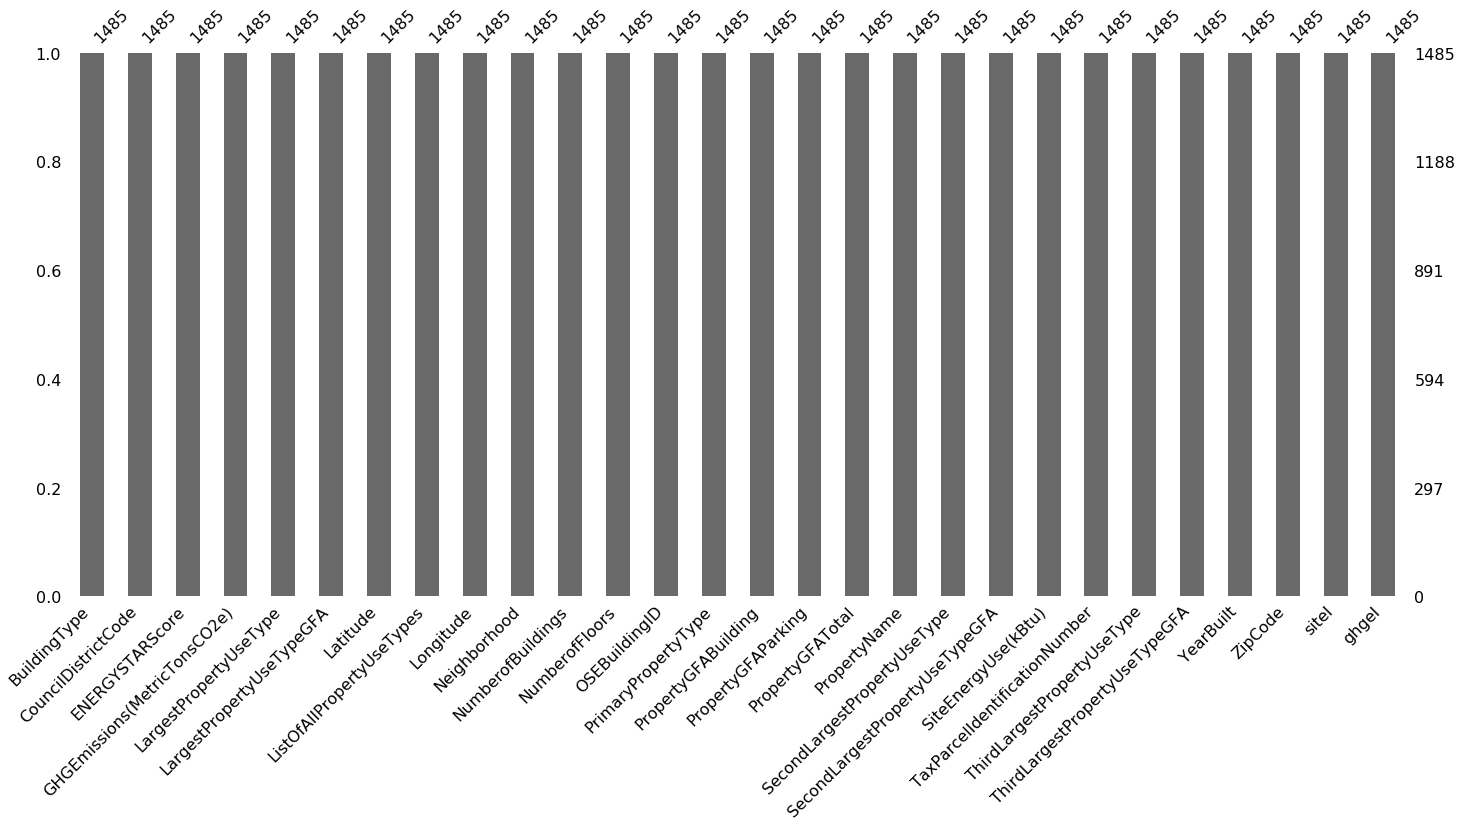

In [73]:
# Aprés remplissage 
msno.bar(data)

#### Exportation dataframe data en csv

In [74]:
data.to_csv(r'C:\Users\HP\Desktop\OpenClassroom\P4_Ezznati_Traiq\Mesnotesbook\dataf.csv',index=False)